In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
data=pd.read_csv("C:\\Users\\amjal\\Downloads\\iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
data.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [4]:
data.shape

(150, 5)

In [5]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [8]:
data.describe(include='all')

,sepal.length,sepal.width,petal.length,petal.width,variety
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [11]:
count = data['variety'].value_counts()
count.to_frame()

,variety
Setosa,50
Versicolor,50
Virginica,50


In [12]:
label = count.index.tolist()
val = count.values.tolist()

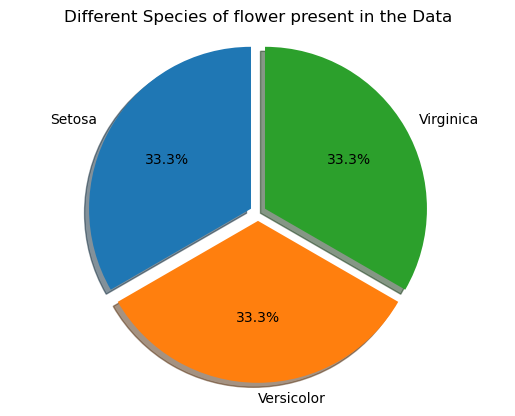

In [13]:
exp = (0.05,0.05,0.05)
fig,ax = plt.subplots()
ax.pie(val, explode=exp, labels=label, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Different Species of flower present in the Data")
ax.axis('equal')
plt.show()

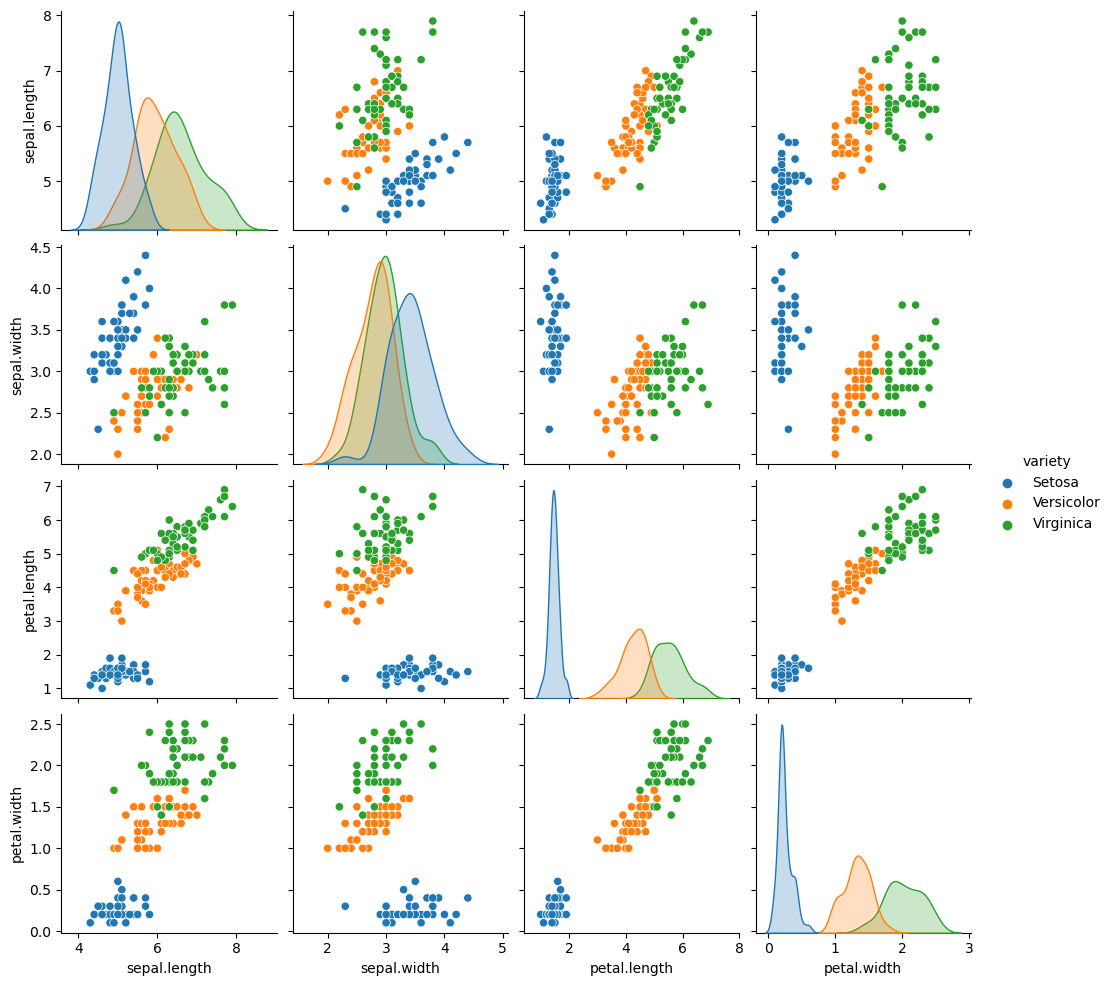

In [15]:
sns.pairplot(data=data, hue='variety')
plt.show()

C:\Users\amjal\AppData\Local\Temp\ipykernel_18644\3453495221.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<Axes: >

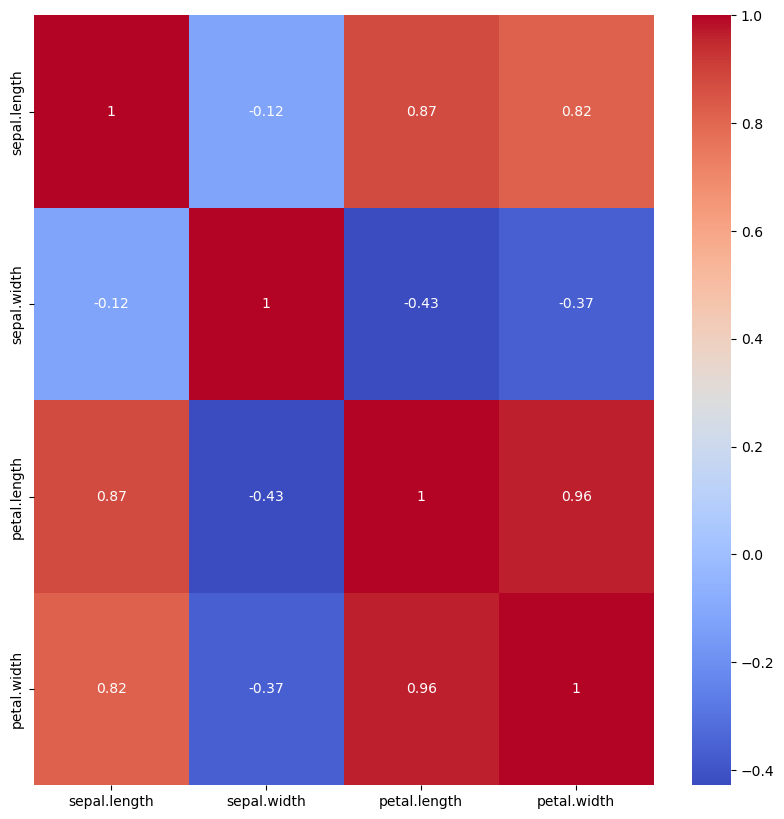

In [16]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

In [18]:
x = data.iloc[:, 0:4]
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
y = (data.iloc[:, 4])
y.head().to_frame()

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [20]:
std = StandardScaler()
x = std.fit_transform(x)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1)
x_train, x_test, y_train, y_test

(array([[ 2.24968346e+00, -1.05276654e+00,  1.78583195e+00,
          1.44883158e+00],
        [-1.73673948e-01,  1.70959465e+00, -1.16971425e+00,
         -1.18381211e+00],
        [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-1.26418478e+00, -1.31979479e-01, -1.34022653e+00,
         -1.18381211e+00],
        [-7.79513300e-01, -8.22569778e-01,  8.07091462e-02,
          2.64141916e-01],
        [-9.00681170e-01,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-4.16009689e-01,  1.01900435e+00, -1.39706395e+00,
         -1.31544430e+00],
        [ 2.24968346e+00,  1.70959465e+00,  1.67215710e+00,
          1.31719939e+00],
        [ 1.28034050e+00,  9.82172869e-02,  9.33270550e-01,
          1.18556721e+00],
        [ 1.76501198e+00, -3.62176246e-01,  1.44480739e+00,
          7.90670654e-01],
        [ 6.74501145e-01, -5.92373012e-01,  1.04694540e+00,
          1.31719939e+00],
        [ 4.32165405e-01, -5.92373012e-01, 

In [22]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [23]:
y_pred = model.predict(x_test)
y_pred

array(['Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Versicolor', 'Virginica', 'Setosa', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Virginica', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Virginica',
       'Virginica', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [24]:
acc = accuracy_score(y_test, y_pred)
print("The Accuracy of the Decision Tree Algorithms is : ", str(acc*100) + "%")

The Accuracy of the Decision Tree Algorithms is :  95.55555555555556%


In [25]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [27]:
lst = data['variety'].unique().tolist()
df_cm = pd.DataFrame(data = cm, index = lst, columns = lst)
df_cm

,Setosa,Versicolor,Virginica
Setosa,14,0,0
Versicolor,0,17,1
Virginica,0,1,12


In [28]:
data.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [29]:
col = data.columns.tolist()
print(col)

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']


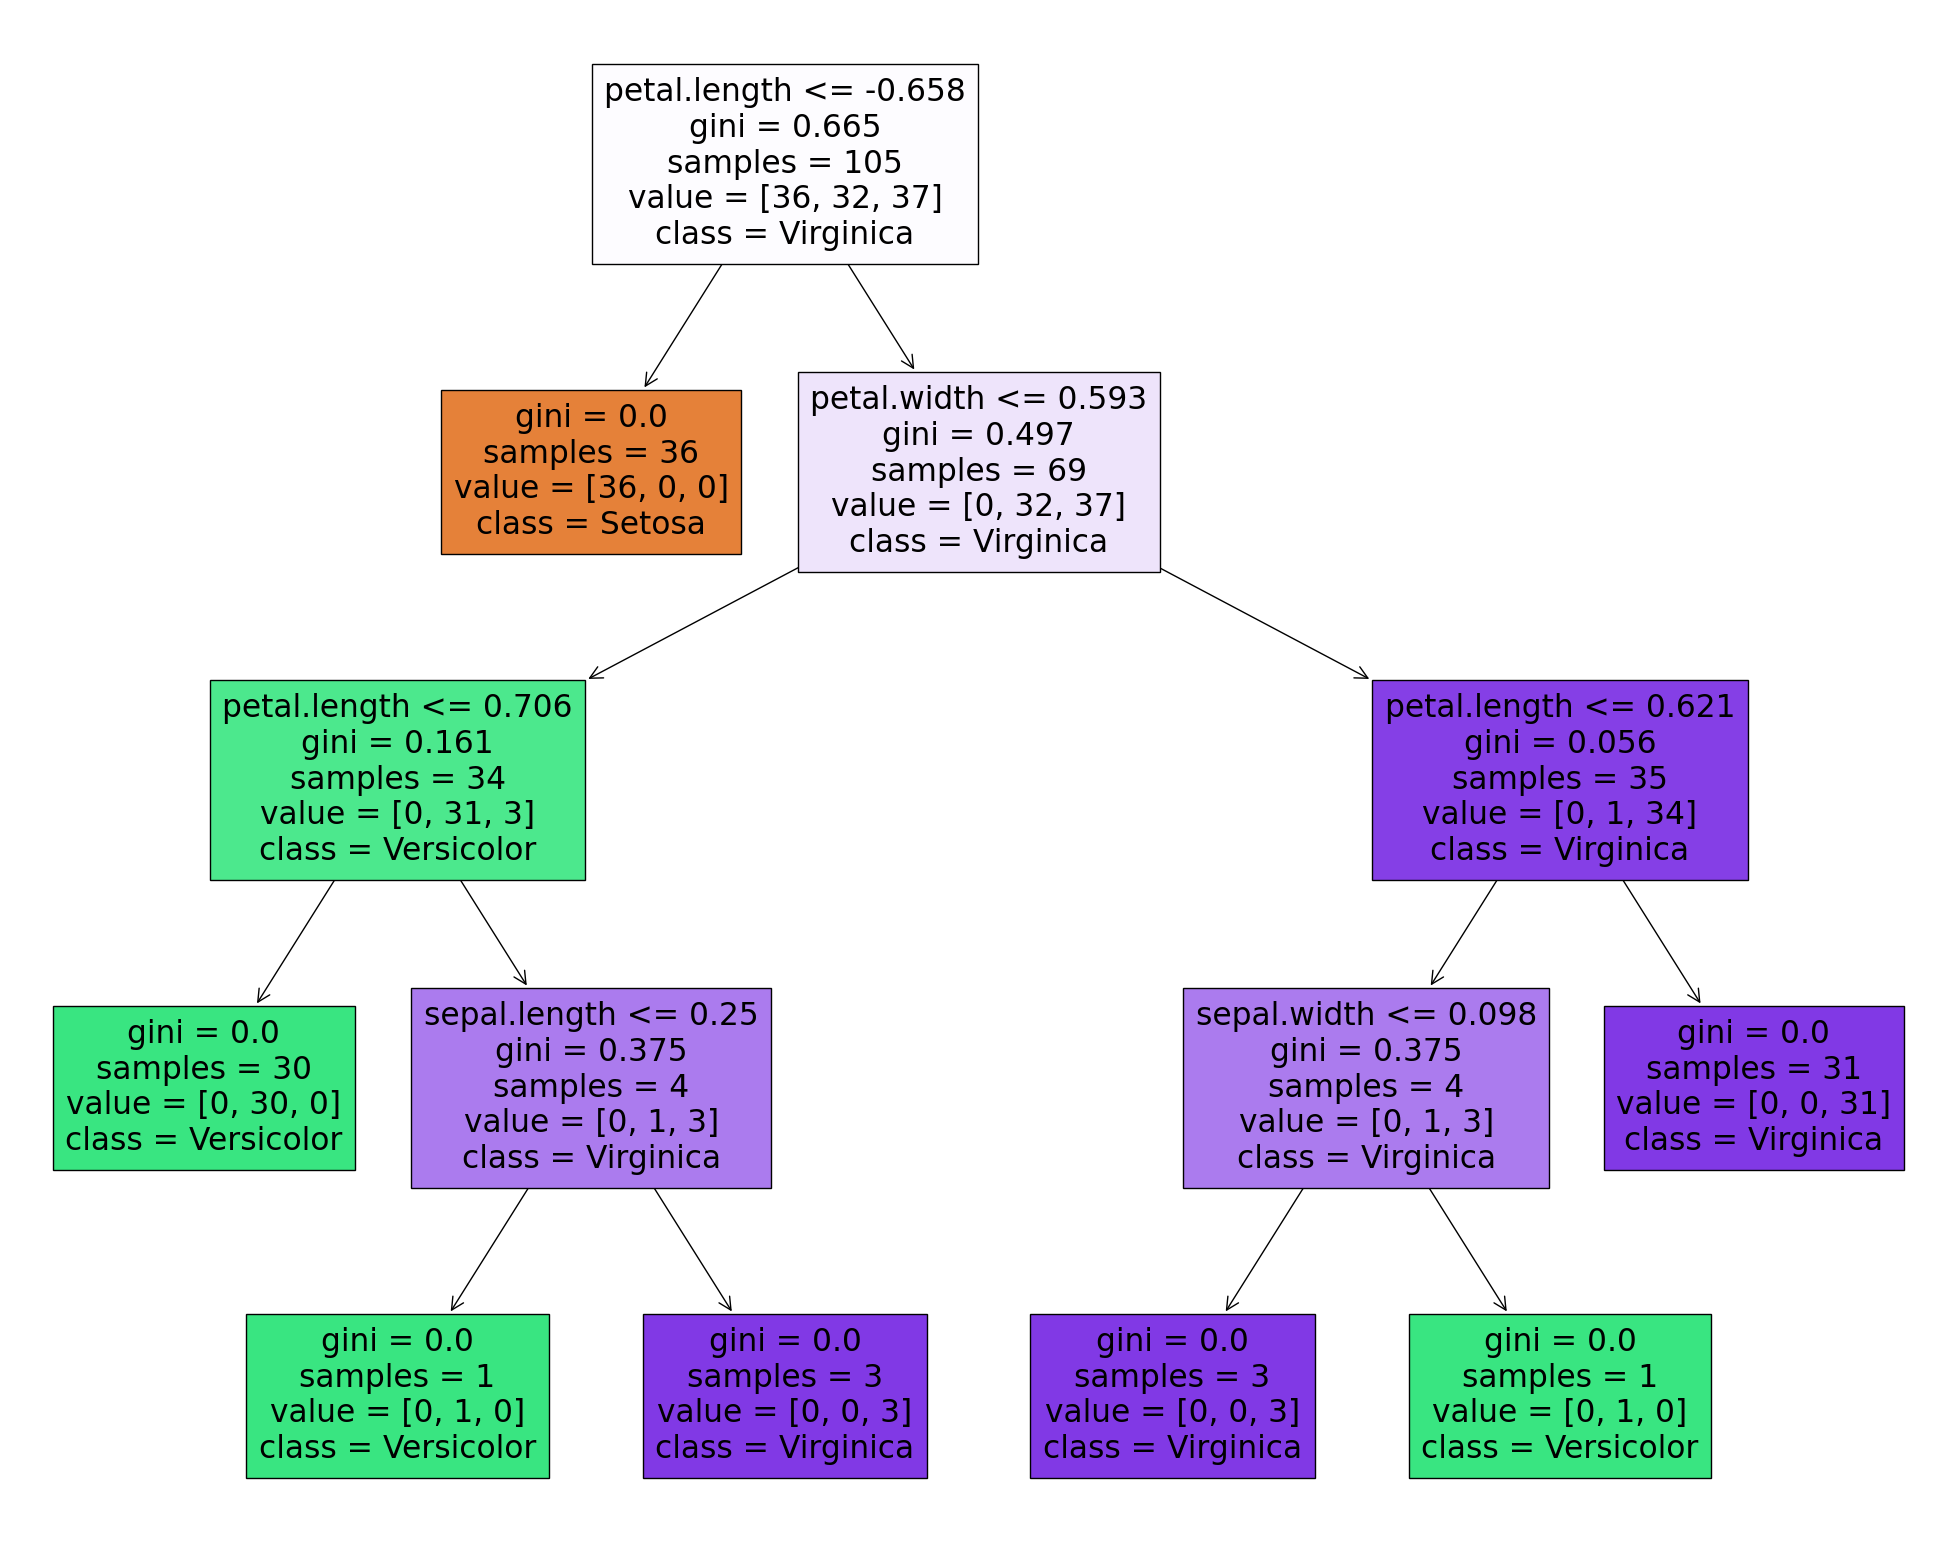

In [30]:
fig = plt.figure(figsize=(25, 20))
tree_img = plot_tree(model, feature_names = col, class_names = lst, filled = True)